# Help

The notebook retrives the data from the UN Com Trade and prepares the data for ready analysis. The parameters in the next cell can be changed and the notebook can be run again to get updated results. The code paramaters can be located using the links.

* Reporter Area (r): https://comtrade.un.org/Data/cache/reporterAreas.json
* Partner Area (p): https://comtrade.un.org/Data/cache/partnerAreas.json
* Frequency (freq): Monthly - M, Annual - A
* Period (ps) : Annual (YYYY) - 2019, Monthly (YYYY or YYYYMM): Individual periods as 201001 or full years as 2010, automatically expands to query periods 201001,201002,201003,...,201012.
* Classification (px): HS
* Regime (rg) : [{'id': '1', 'text': 'Import'}, {'id': '2', 'text': 'Export'}, {'id': '3', 'text': 're-Export'}, {'id': '4', 'text': 're-Import'}]
* Classification Code (cc): a commodity code valid in the selected classification. Full lists of codes for each classification are linked to above under the px parameter. Some codes are valid in all classifications - 
TOTAL Total trade between reporter and partner, no detail breakdown. AG1, AG2, AG3, AG4, AG5, AG6 Detailed codes at a specific digit level. For instance AG6 in HS gives all of the 6-digit codes, which are the most detailed codes that are internationally comparable. Not all classifications have all digit levels available.  ALL All codes in the classification.

**a series is reporter data, b series is partner data**

**Make change to other cell at your own discretion. A wrong change will break the application. When making change in the next cell, please make sure the value is enclosed by single quote. When data is pulled you can see the parameters which are used to full data**

In [1]:
# Reporter
reporter = '699' # India
# Partner
partner = '418' # Laos
# Period
period = '2019' # Annual
# Classification Code
cc = 'AG4' # AG2, AG4, AG6

# Initialisation

In [2]:
import os
import sys
sys.path.append("../..") 
ROOT_DIR = '/home/jovyan/tta'

import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 5000)
plt.rcParams['figure.figsize'] = [20, 10]

from comtrade.analysis import Analysis
tta = Analysis()

# Available

In [3]:
status = tta.data_available(reporter, 201912, 'HS', 'M')
print(status)
status = tta.data_available(partner, 201912, 'HS', 'M')
print(status)

[{'type': 'COMMODITIES', 'freq': 'MONTHLY', 'px': 'HS', 'r': '699', 'rDesc': 'India', 'ps': '201912', 'TotalRecords': 251502, 'isOriginal': 1, 'publicationDate': '2020-03-02T00:00:00', 'isPartnerDetail': 1}]
[{'type': 'COMMODITIES', 'freq': 'MONTHLY', 'px': 'HS', 'r': '418', 'rDesc': "Lao People's Dem. Rep.", 'ps': '201912', 'TotalRecords': 15299, 'isOriginal': 1, 'publicationDate': '2020-06-14T00:00:00', 'isPartnerDetail': 1}]


## Import Data

In [4]:
rp_imp = tta.api.get_month_data(reporter, partner, 1, period) 
pt_exp = tta.api.get_month_data(partner, reporter, 2, period) 

{'r': '699', 'p': '418', 'rg': 1, 'ps': '201901', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': '699', 'p': '418', 'rg': 1, 'ps': '201902', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': '699', 'p': '418', 'rg': 1, 'ps': '201903', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': '699', 'p': '418', 'rg': 1, 'ps': '201904', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': '699', 'p': '418', 'rg': 1, 'ps': '201905', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': '699', 'p': '418', 'rg': 1, 'ps': '201906', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': '699', 'p': '418', 'rg': 1, 'ps': '201907', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': '699', 'p': '418', 'rg': 1, 'ps': '201908', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': '699', 'p': '418', 'rg': 1, 'ps': '201909', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': '699', 'p': '418', 'rg': 1, 'ps

In [5]:
df = pd.DataFrame.from_dict([rp_imp, pt_exp])
df.index = ['reporter', 'partner']
df = df.T
df['month'] = df.index
df

,reporter,partner,month
201901,17102,12572373,201901
201902,14297,14744128,201902
201903,12809,13904361,201903
201904,212131,884799,201904
201905,127633,15071591,201905
201906,112976,8605716,201906
201907,339299,75958,201907
201908,17007,0,201908
201909,47145,21605,201909
201910,34744,126796,201910


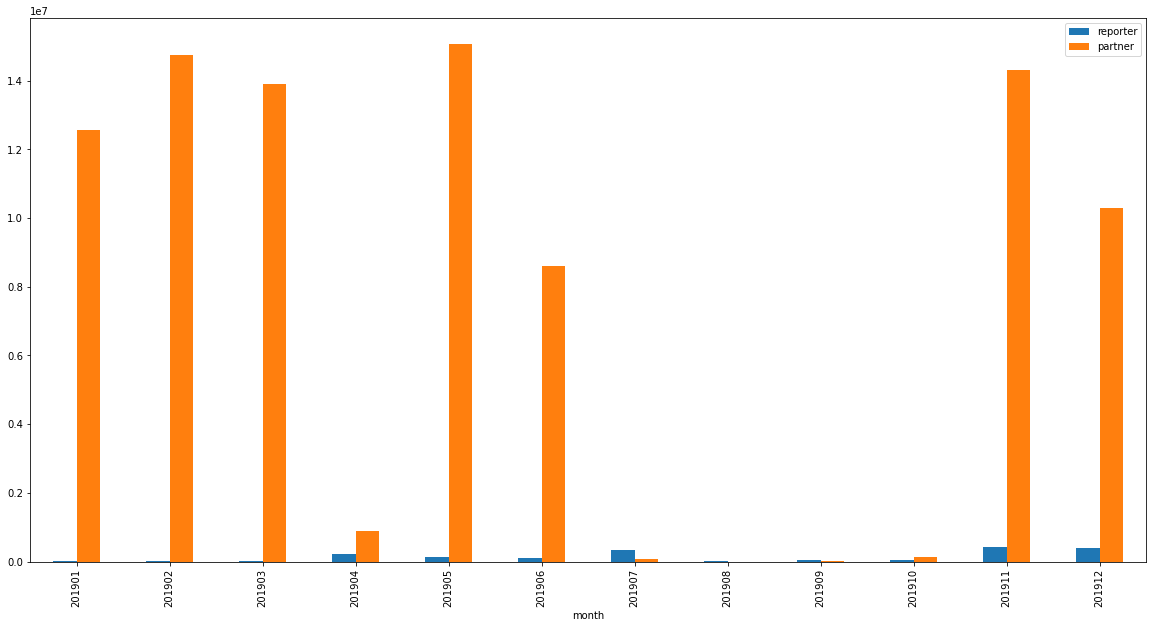

In [6]:
df.plot(kind='bar', y=['reporter','partner'], x='month')
plt.show()

# Export Data

In [7]:
rp_exp = tta.api.get_month_data(reporter, partner, 2, period) 
pt_imp = tta.api.get_month_data(partner, reporter, 1, period) 

{'r': '699', 'p': '418', 'rg': 2, 'ps': '201901', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': '699', 'p': '418', 'rg': 2, 'ps': '201902', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': '699', 'p': '418', 'rg': 2, 'ps': '201903', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': '699', 'p': '418', 'rg': 2, 'ps': '201904', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': '699', 'p': '418', 'rg': 2, 'ps': '201905', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': '699', 'p': '418', 'rg': 2, 'ps': '201906', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': '699', 'p': '418', 'rg': 2, 'ps': '201907', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': '699', 'p': '418', 'rg': 2, 'ps': '201908', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': '699', 'p': '418', 'rg': 2, 'ps': '201909', 'px': 'HS', 'cc': 'TOTAL', 'freq': 'M', 'max': '100000'}
{'r': '699', 'p': '418', 'rg': 2, 'ps

In [8]:
df = pd.DataFrame.from_dict([rp_imp, pt_exp])
df.index = ['reporter', 'partner']
df = df.T
df['month'] = df.index
df

,reporter,partner,month
201901,17102,12572373,201901
201902,14297,14744128,201902
201903,12809,13904361,201903
201904,212131,884799,201904
201905,127633,15071591,201905
201906,112976,8605716,201906
201907,339299,75958,201907
201908,17007,0,201908
201909,47145,21605,201909
201910,34744,126796,201910


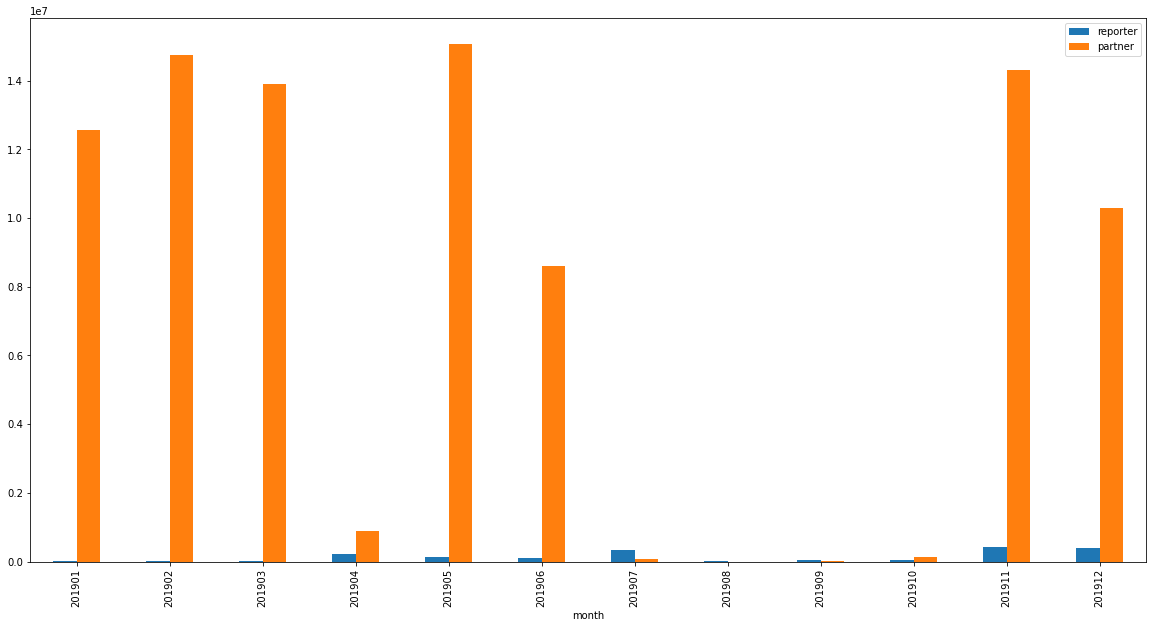

In [9]:
df.plot(kind='bar', y=['reporter','partner'], x='month')
plt.show()